In [17]:
# import yfinance as yf
# import pandas as pd
# from datetime import datetime

# # Define Nifty 50 Index symbol for Yahoo Finance
# nifty_symbol = "^NSEI"

# # Define start and end dates for full history (from 2000 onwards)
# start_date = "2000-01-01"
# end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date

# # Fetch the data using yfinance
# print(f"Downloading Nifty 50 data from {start_date} to {end_date}...")
# nifty_data = yf.download(nifty_symbol, start=start_date, end=end_date, interval="1d")

# # Check if data is empty
# if nifty_data.empty:
#     print("❌ No data fetched. Check your internet connection or symbol.")
# else:
#     # Reset index to make Date a column
#     nifty_data.reset_index(inplace=True)

#     # Save to CSV
#     filename = "nifty50_full_data.csv"
#     nifty_data.to_csv(filename, index=False)
#     print(f"✅ Data saved successfully to '{filename}'")


In [18]:
# nifty = yf.Ticker("^NSEI")
# live_price = nifty.history(period="1d")
# print("Current Nifty Price:", live_price['Close'].iloc[-1])


In [19]:
import pandas as pd

In [20]:
df = pd.read_csv(r"nifty50_full_data.csv")

In [21]:
df = df.iloc[1:].reset_index(drop=True)

In [22]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2007-09-17,4494.64990234375,4549.0498046875,4482.85009765625,4518.4501953125,0
1,2007-09-18,4546.2001953125,4551.7998046875,4481.5498046875,4494.10009765625,0
2,2007-09-19,4732.35009765625,4739.0,4550.25,4550.25,0
3,2007-09-20,4747.5498046875,4760.85009765625,4721.14990234375,4734.85009765625,0
4,2007-09-21,4837.5498046875,4855.7001953125,4733.7001953125,4752.9501953125,0


In [23]:
df.tail()

,Date,Close,High,Low,Open,Volume
4327,2025-05-15,25062.099609375,25116.25,24494.44921875,24694.44921875,500800
4328,2025-05-16,25019.80078125,25070.0,24953.05078125,25064.650390625,432700
4329,2025-05-19,24945.44921875,25062.94921875,24916.650390625,25005.349609375,255300
4330,2025-05-20,24683.900390625,25010.349609375,24669.69921875,24996.19921875,414800
4331,2025-05-21,24813.44921875,24946.19921875,24685.349609375,24744.25,332700


## Arima

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\P

📊 Evaluation Metrics:
MAE  (Mean Absolute Error)     : 3186.6186
MSE  (Mean Squared Error)      : 13243670.3995
RMSE (Root Mean Squared Error) : 3639.1854
R² Score (Coefficient of Determination): -2.9938


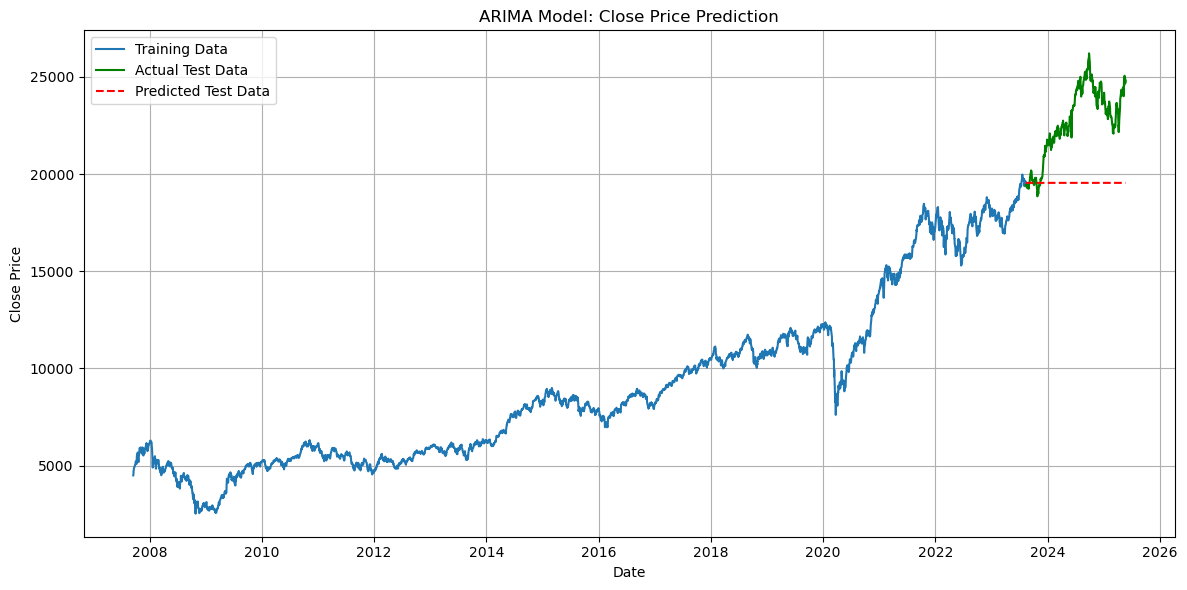

In [24]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv("nifty50_full_data.csv")

# Keep only 'Date' and 'Close'
df = df[['Date', 'Close']]

# Convert 'Date' to datetime and 'Close' to numeric
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Remove rows with missing values
df = df.dropna(subset=['Close'])

# Sort data by Date and set it as index (ARIMA assumes time index)
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Create time series
close_series = df['Close']

# Train-test split (90% train, 10% test)
split_idx = int(len(close_series) * 0.9)
train = close_series[:split_idx]
test = close_series[split_idx:]

# Fit ARIMA model (p,d,q) = (5,1,0) — can be tuned
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluation
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test, forecast)

print("📊 Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error)     : {mae:.4f}")
print(f"MSE  (Mean Squared Error)      : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='Predicted Test Data', color='red', linestyle='--')
plt.title("ARIMA Model: Close Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## LSTM

C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
📊 Evaluation Metrics:
MAE  (Mean Absolute Error)     : 250.2045
MSE  (Mean Squared Error)      : 107049.1470
RMSE (Root Mean Squared Error) : 327.1837
R² Score (Coefficient of Determination): 0.9672


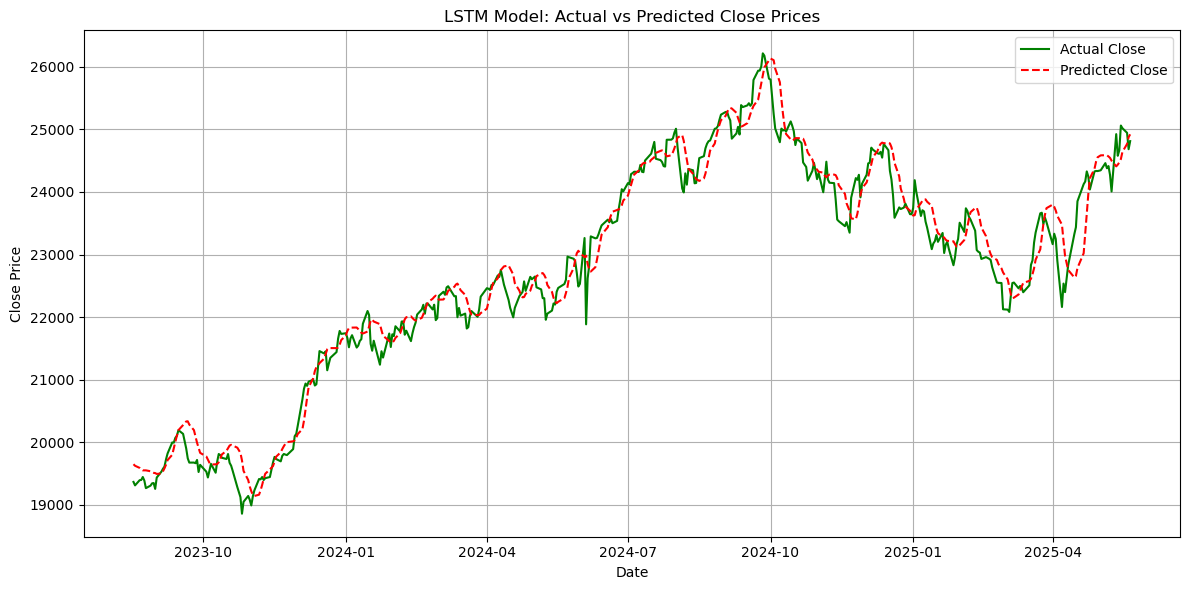

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv("nifty50_full_data.csv")

# Keep only 'Date' and 'Close'
df = df[['Date', 'Close']]

# Convert and clean
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)

# Set Date as index (for plotting and continuity)
df.set_index('Date', inplace=True)

# Normalize 'Close' values
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df[['Close']])

# Function to create sequences of 30 days to predict next day
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_close, seq_length)

# Split into train and test (90%-10%)
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(32),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# Predict
predicted_scaled = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_scaled)
actual_prices = scaler.inverse_transform(y_test)

# Evaluation
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, predicted_prices)

print("📊 Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error)     : {mae:.4f}")
print(f"MSE  (Mean Squared Error)      : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")

# Plotting: align predictions to actual Date index
actual_dates = df.index[seq_length + split:]
plt.figure(figsize=(12, 6))
plt.plot(actual_dates, actual_prices, label='Actual Close', color='green')
plt.plot(actual_dates, predicted_prices, label='Predicted Close', color='red', linestyle='--')
plt.title("LSTM Model: Actual vs Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
from tensorflow.keras.models import load_model
import os

# Create directory if it doesn't exist
model_dir = "saved_model"
os.makedirs(model_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(model_dir, "LSTM_model.h5")
model.save(model_path)

print(f"✅ Model successfully saved at: {model_path}")


✅ Model successfully saved at: saved_model\LSTM_model.h5


## Stacked LSTM

Epoch 1/25


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0116
Epoch 2/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1789e-04
Epoch 3/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1345e-04
Epoch 4/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8184e-04
Epoch 5/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8370e-04
Epoch 6/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8258e-04
Epoch 7/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4996e-04
Epoch 8/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9224e-04
Epoch 9/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.3186e-04
Epoch 10/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6097e-04
Epoch 11/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2042e-04
Epoch 12/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2226e-04
Epoch 13/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1270e-04
Epoch 14/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5986e-04
Ep

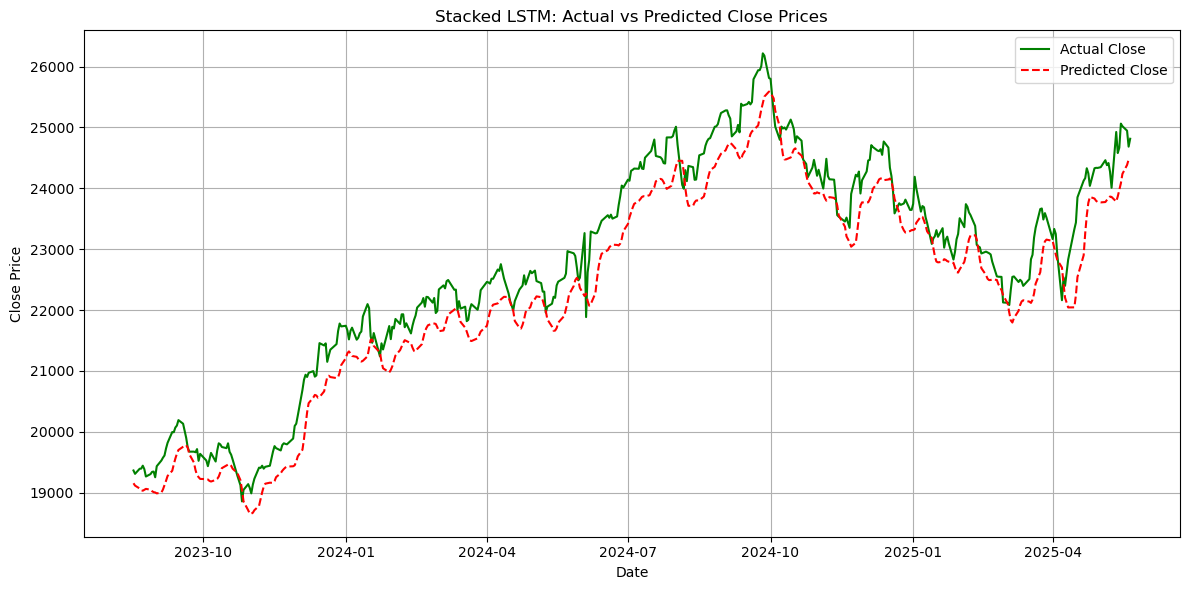

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and clean data
df = pd.read_csv("nifty50_full_data.csv")
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Normalize 'Close'
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df[['Close']])

# Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

seq_len = 30
X, y = create_sequences(scaled_close, seq_len)

# Split data (90% train, 10% test)
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build stacked LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_len, 1)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# Predict and inverse scale
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# Evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"📊 MAE  : {mae:.2f}")
print(f"📊 MSE  : {mse:.2f}")
print(f"📊 RMSE : {rmse:.2f}")
print(f"📊 R²    : {r2:.4f}")

# Get actual dates for predictions
dates = df.index[seq_len + split:]

# Plot with Date on x-axis
plt.figure(figsize=(12, 6))
plt.plot(dates, y_true, label='Actual Close', color='green')
plt.plot(dates, y_pred, label='Predicted Close', color='red', linestyle='--')
plt.title("Stacked LSTM: Actual vs Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
from tensorflow.keras.models import load_model
import os

# Create directory if it doesn't exist
model_dir = "saved_model"
os.makedirs(model_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(model_dir, "stacked_LSTM_model.h5")
model.save(model_path)

print(f"✅ Model successfully saved at: {model_path}")


✅ Model successfully saved at: saved_model\stacked_LSTM_model.h5


## GRU

Epoch 1/20


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0265
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.8888e-05
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3689e-05
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.1100e-05
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2223e-05
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5195e-05
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9374e-05
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.0012e-05
Epoch 9/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.1534e-05
Epoch 10/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.6676e-05
Epoch 11/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.1674e-05
Epoch 12/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.5799e-05
Epoch 13/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9196e-05
Epoch 14/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.3818e-05
Epoch 15/20
132/

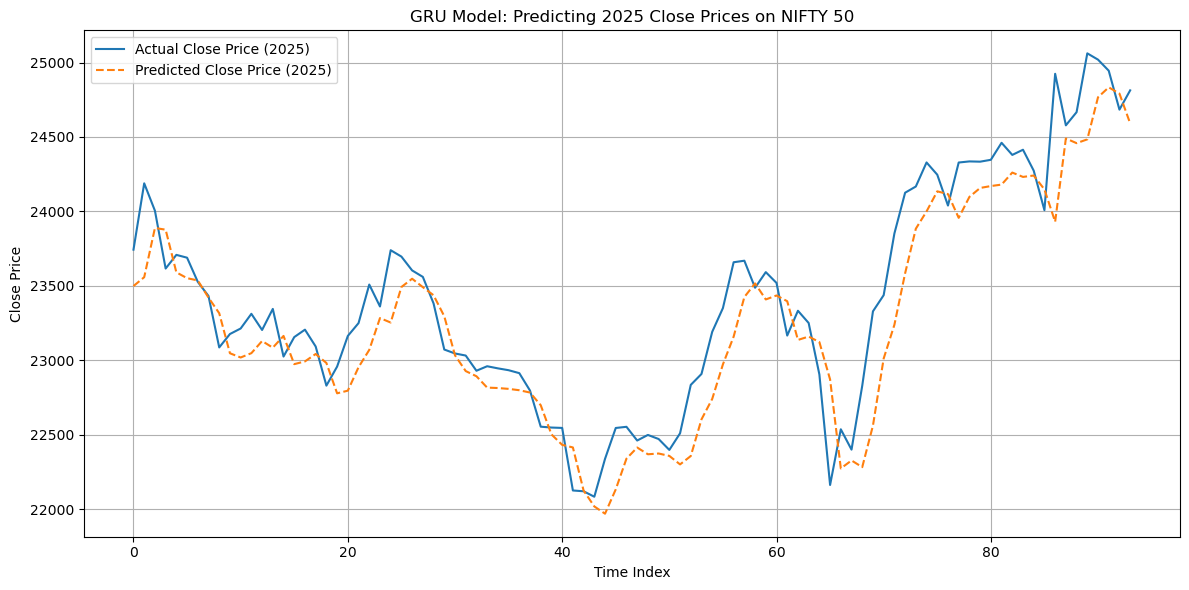

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load dataset
df = pd.read_csv("nifty50_full_data.csv")

# Convert and clean
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)

# Separate train (till 2024) and test (2025 onwards)
train_df = df[df.index < '2025-01-01']
test_df = df[df.index >= '2025-01-01']

# Fit scaler only on training data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[['Close']])
test_scaled = scaler.transform(test_df[['Close']])

# Function to create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

seq_len = 30

# Create sequences
X_train, y_train = create_sequences(train_scaled, seq_len)

# For test data, append last 30 days of train to build proper sequence
combined_test = np.concatenate((train_scaled[-seq_len:], test_scaled), axis=0)
X_test, y_test = create_sequences(combined_test, seq_len)

# Reshape for GRU input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build GRU model
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(seq_len, 1)),
    GRU(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict
predicted_scaled = model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test)

# Evaluation Metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

print("📊 Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error)     : {mae:.4f}")
print(f"MSE  (Mean Squared Error)      : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Close Price (2025)')
plt.plot(predicted, label='Predicted Close Price (2025)', linestyle='--')
plt.title("GRU Model: Predicting 2025 Close Prices on NIFTY 50")
plt.xlabel("Time Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
from tensorflow.keras.models import load_model
import os

# Create directory if it doesn't exist
model_dir = "saved_model"
os.makedirs(model_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(model_dir, "optimized_gru_model.h5")
model.save(model_path)

print(f"✅ Model successfully saved at: {model_path}")


✅ Model successfully saved at: saved_model\optimized_gru_model.h5


## GRU

Epoch 1/50


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0357 - val_loss: 0.0014
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 7.8167e-04 - val_loss: 9.8145e-04
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1.1187e-04 - val_loss: 2.8430e-04
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 7.6842e-05 - val_loss: 3.8058e-04
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 6.5619e-05 - val_loss: 2.2667e-04
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 6.3228e-05 - val_loss: 3.4717e-04
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 6.7102e-05 - val_loss: 2.4810e-04
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 6.4193e-05 - val_loss: 2.6363e-04
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 5.7827e-05 - val_loss: 2.9284e-04
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 6.1851e-05 - val_loss: 1.7465e-04
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 5.8045e-05 - val_loss: 2.308

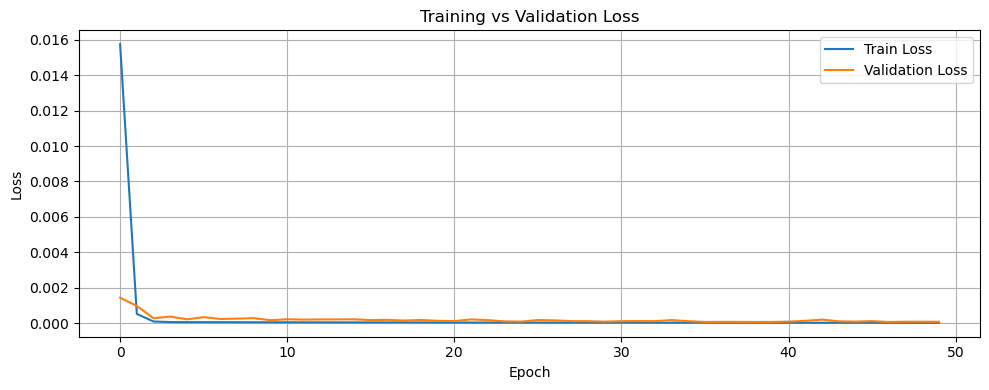

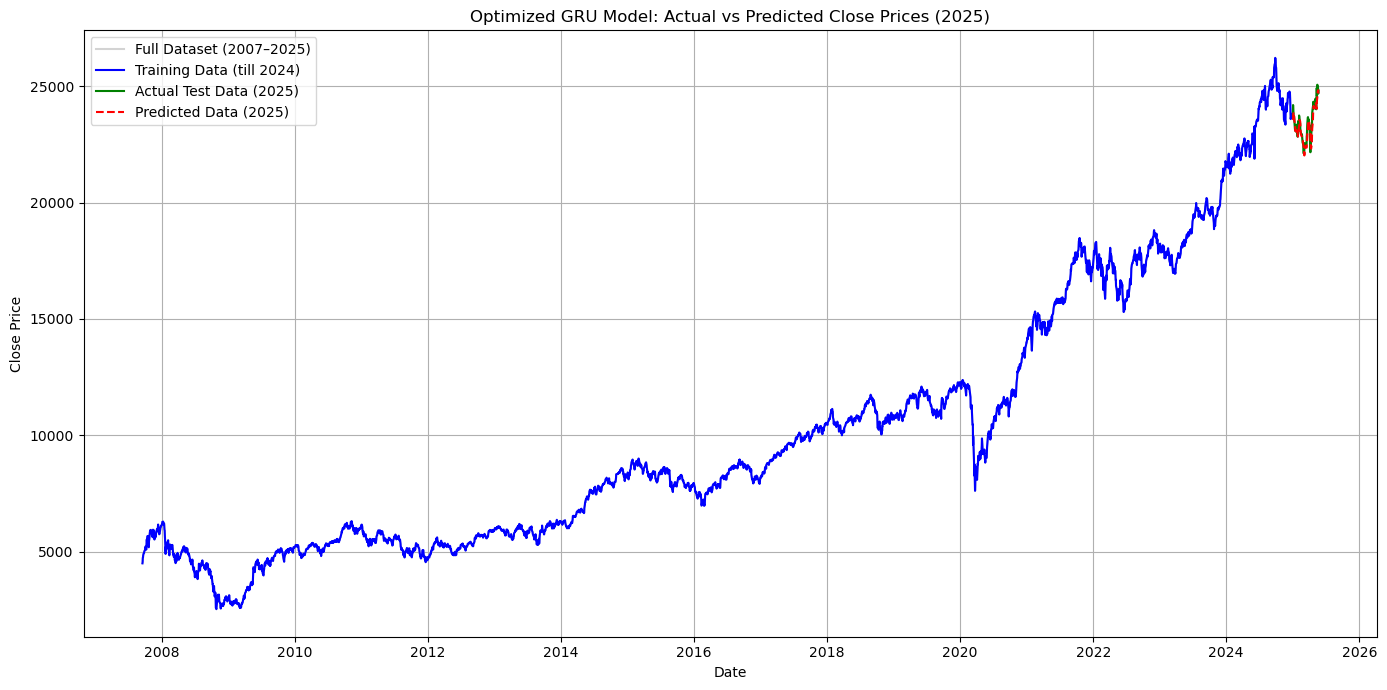

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Load and preprocess data
df = pd.read_csv("nifty50_full_data.csv")
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Train-test split
train_df = df[df.index < '2025-01-01']
test_df = df[df.index >= '2025-01-01']

# Scale Close column
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[['Close']])
test_scaled = scaler.transform(test_df[['Close']])

# Create sequence function
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

seq_len = 30
X_train, y_train = create_sequences(train_scaled, seq_len)

# Append last 30 train values to test
combined_test = np.concatenate((train_scaled[-seq_len:], test_scaled), axis=0)
X_test, y_test = create_sequences(combined_test, seq_len)

# Reshape for GRU
X_train = X_train.reshape((X_train.shape[0], seq_len, 1))
X_test = X_test.reshape((X_test.shape[0], seq_len, 1))

# Build optimized GRU model
model = Sequential([
    GRU(128, return_sequences=True, input_shape=(seq_len, 1)),
    GRU(64, return_sequences=True),
    GRU(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


# Train with validation split
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=150,
    validation_split=0.1,
    verbose=1
)

# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# Evaluation
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("📊 Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error)     : {mae:.4f}")
print(f"MSE  (Mean Squared Error)      : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")

# Plot loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot prediction vs actual
test_dates = test_df.index[:len(y_true)]

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Full Dataset (2007–2025)', color='lightgray')
plt.plot(train_df.index, train_df['Close'], label='Training Data (till 2024)', color='blue')
plt.plot(test_dates, y_true, label='Actual Test Data (2025)', color='green')
plt.plot(test_dates, y_pred, label='Predicted Data (2025)', color='red', linestyle='--')

plt.title("Optimized GRU Model: Actual vs Predicted Close Prices (2025)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
from tensorflow.keras.models import load_model
import os

# Create directory if it doesn't exist
model_dir = "saved_model"
os.makedirs(model_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(model_dir, "optimized_gru_model1.h5")
model.save(model_path)

print(f"✅ Model successfully saved at: {model_path}")


✅ Model successfully saved at: saved_model\optimized_gru_model1.h5
